In [32]:
# Libraries 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import time




<div class="alert alert-block alert-success" style="color: white; background-color: gray; font-size: 20px; text-align: center;">
    <b>GET THE DATA</b>
</div>


In [33]:
# Load the fashion_mnist dataset
(ds1_images, ds1_labels), (ds2_images, ds2_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Create dictionaries to store the datasets
ds1_hozana = {'images': ds1_images[:60000], 'labels': ds1_labels[:60000]}
ds2_hozana = {'images': ds2_images[:10000], 'labels': ds2_labels[:10000]}


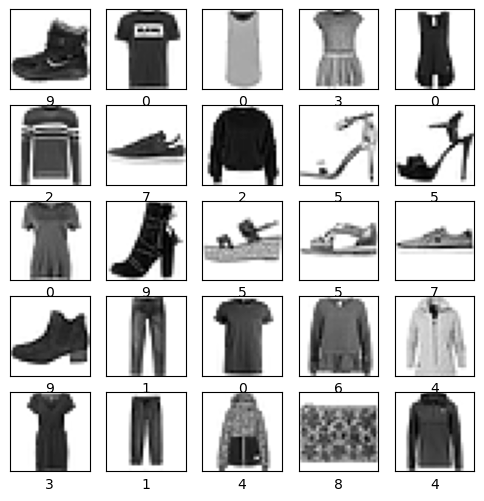

In [51]:
# Visualize sample images
plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ds1_hozana['images'][i], cmap=plt.cm.binary)
    plt.xlabel(ds1_hozana['labels'][i])
plt.show()


<div class="alert alert-block alert-success" style="color: white; background-color: gray; font-size: 20px; text-align: center;">
    <b>DATASET PRE-PROCESSING</b>
</div>


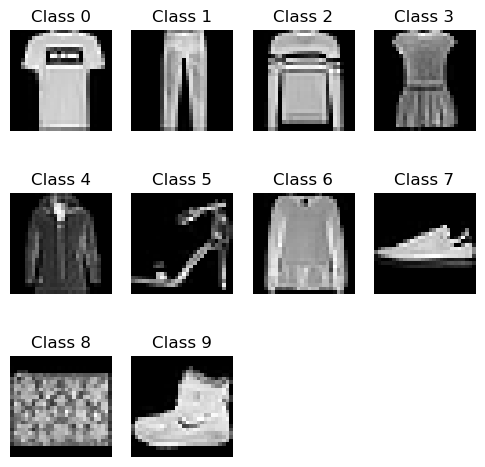

In [53]:
# Class Distribution
unique_train_labels, train_labels_counts = np.unique(ds1_hozana['labels'], return_counts=True)
unique_test_labels, test_labels_counts = np.unique(ds1_hozana['labels'], return_counts=True)

# Sample Class Images
plt.figure(figsize=(6, 6))
for i in range(10):
    plt.subplot(3, 4, i + 1)
    label = ds1_hozana['labels'] == i
    plt.imshow(ds1_hozana['images'][np.argmax(label)], cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()


In [34]:
#Normalize pixel values to range between -1 and 1
ds1_hozana['images'] = (ds1_hozana['images'].astype(np.float32) - 127.5) / 127.5
ds2_hozana['images'] = (ds2_hozana['images'].astype(np.float32) - 127.5) / 127.5


print("Shape of ds1_hozana['images']: ", ds1_hozana['images'].shape)
print("Shape of ds2_hozana['images']: ", ds2_hozana['images'].shape)

Shape of ds1_hozana['images']:  (60000, 28, 28)
Shape of ds2_hozana['images']:  (10000, 28, 28)


In [35]:
# Concatenate images datasets
ds1_pants_indices = np.where(ds1_hozana['labels'] == 1)[0]
ds2_pants_indices = np.where(ds2_hozana['labels'] == 1)[0]

ds1_pants_images = ds1_hozana['images'][ds1_pants_indices]
ds2_pants_images = ds2_hozana['images'][ds2_pants_indices]

dataset_hozana = np.concatenate([ds1_pants_images, ds2_pants_images])


print("Shape of dataset_hozana: ", dataset_hozana.shape)

Shape of dataset_hozana:  (7000, 28, 28)


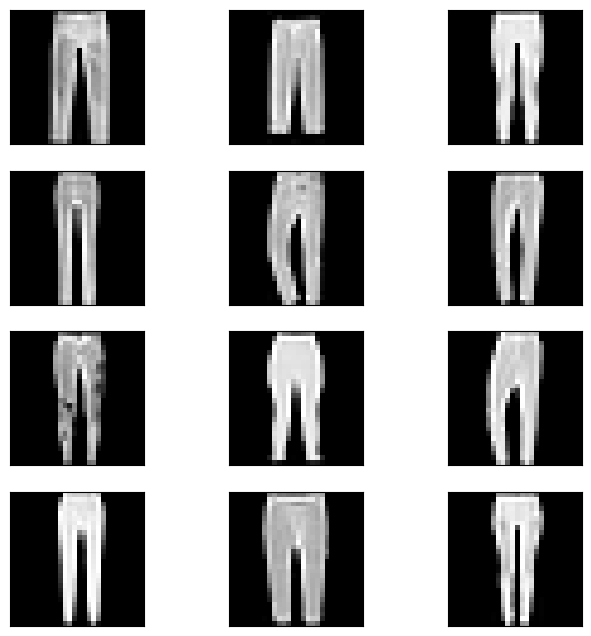

In [36]:
plt.figure(figsize=(8, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(dataset_hozana[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [37]:
# Create training dataset 
train_dataset_hozana = tf.data.Dataset.from_tensor_slices(dataset_hozana)
train_dataset_hozana = train_dataset_hozana.shuffle(buffer_size=dataset_hozana.shape[0]).batch(256)


<div class="alert alert-block alert-success" style="color: white; background-color: gray; font-size: 20px; text-align: center;">
    <b>CNN for GENERATOR ARCHITECTURE</b>
</div>

In [38]:
# Build the Generator Model
generator_model_hozana = tf.keras.Sequential([
    # Fully connected layer
    tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
    # Batch normalization
    tf.keras.layers.BatchNormalization(),
    # Leaky ReLU activation
    tf.keras.layers.LeakyReLU(),
    # Reshape to (7, 7, 256)
    tf.keras.layers.Reshape((7, 7, 256)),
    # Transposed Convolution Layer
    tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
    # Batch normalization
    tf.keras.layers.BatchNormalization(),
    # Leaky ReLU activation
    tf.keras.layers.LeakyReLU(),
    # Transposed Convolution Layer
    tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
    # Batch normalization
    tf.keras.layers.BatchNormalization(),
    # Leaky ReLU activation
    tf.keras.layers.LeakyReLU(),
    # Transposed Convolution Layer with tanh activation
    tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
])

# Display model summary
generator_model_hozana.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

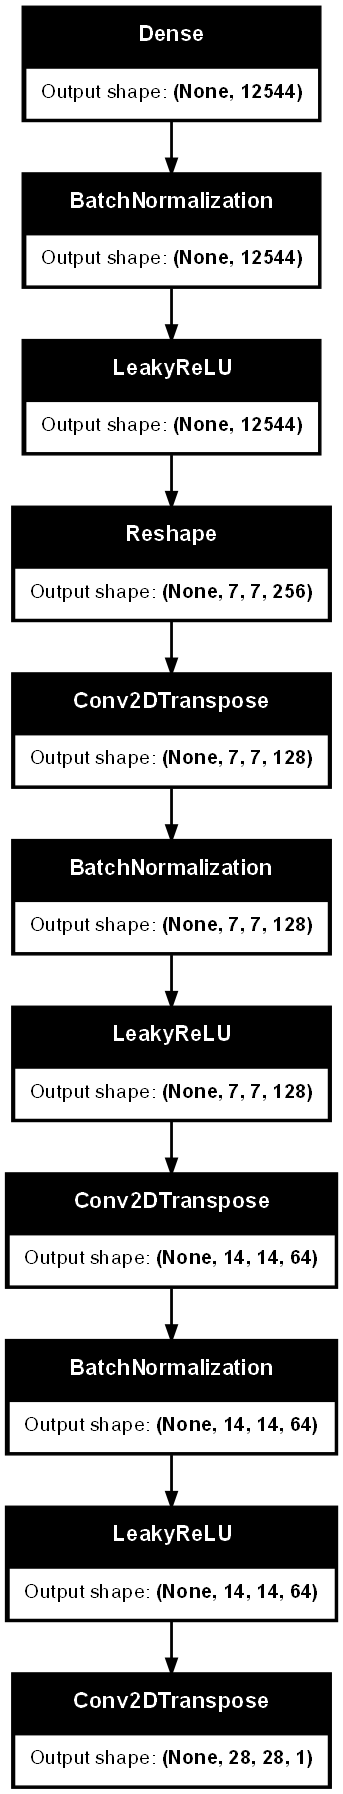

In [39]:
# Generate a diagram illustrating the structure of the neural network model
plot_model(generator_model_hozana, to_file='generator_model_diagram.png', show_shapes=True, expand_nested=True,  dpi=100)


Sample untrained generator

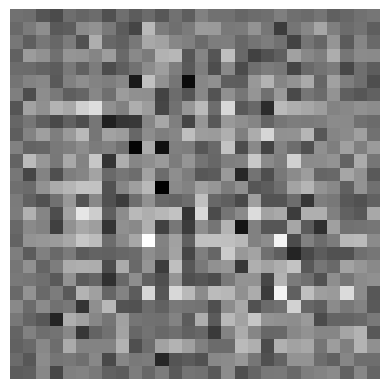

In [40]:
# Create a sample vector with dimension size 100
sample_vector = tf.random.normal([1, 100])

# Generate an image
generated_image = generator_model_hozana(sample_vector, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.axis('off')  # Remove axis ticks
plt.show()



<div class="alert alert-block alert-success" style="color: white; background-color: gray; font-size: 20px; text-align: center;">
    <b>CNN for DISCRIMINATOR ARCHITECTURE</b>
</div>

In [41]:
# Build the Discriminator Model
discriminator_model_hozana = tf.keras.Sequential([
    # Convolutional layer
    tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
    # Leaky ReLU activation
    tf.keras.layers.LeakyReLU(),
    # Dropout layer
    tf.keras.layers.Dropout(0.3),
    # Convolutional layer
    tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
    # Leaky ReLU activation
    tf.keras.layers.LeakyReLU(),
    # Dropout layer
    tf.keras.layers.Dropout(0.3),
    # Transposed Convolution Layer
    tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
    # Batch Normalization
    tf.keras.layers.BatchNormalization(),
    # Leaky ReLU activation
    tf.keras.layers.LeakyReLU(),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # Output layer
    tf.keras.layers.Dense(1)
])

# Display model summary
discriminator_model_hozana.summary()

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,193 (1.62 MB)

 Trainable params: 424,065 (1.62 MB)

 Non-trainable params: 128 (512.00 B)

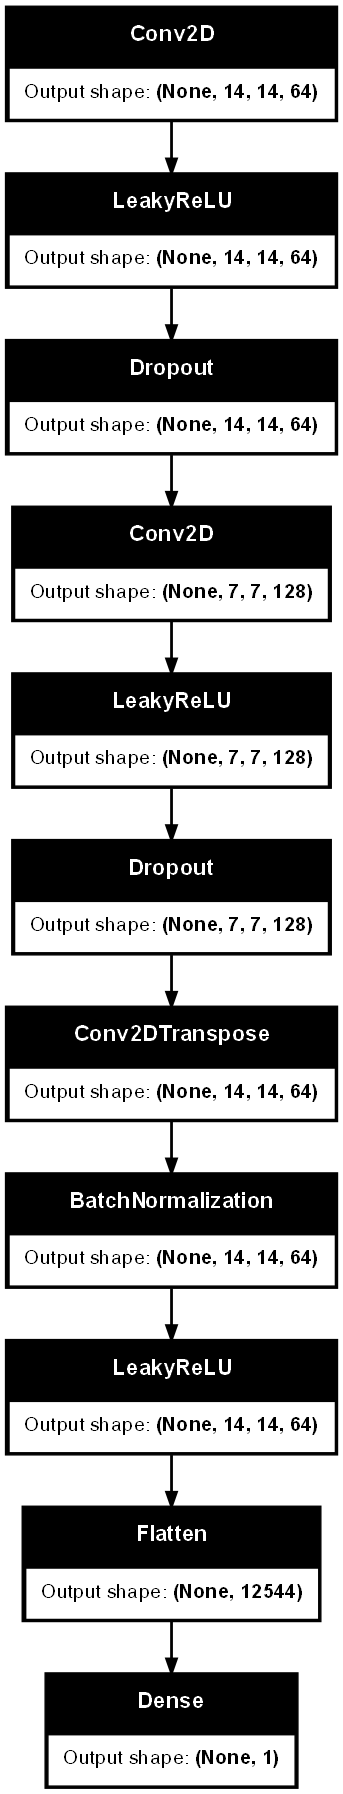

In [42]:
# Generate a diagram illustrating the structure of the neural network model
plot_model(discriminator_model_hozana, to_file='discriminator_model_diagram.png', show_shapes=True, expand_nested=True,  dpi=100)




<div class="alert alert-block alert-success" style="color: white; background-color: gray; font-size: 20px; text-align: center;">
    <b>LOSS and GAN training Step FUNCTION</b>
</div>

In [43]:
# loss function
cross_entropy_hozana = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Create optimizers for generator and discriminator
generator_optimizer_hozana = tf.keras.optimizers.Adam()
discriminator_optimizer_hozana = tf.keras.optimizers.Adam()

In [44]:
@tf.function
def train_step(images):
    noise = tf.random.normal([images.shape[0], 100])  # Generate random noise
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator_model_hozana(noise, training=True)  # Generate fake images
        real_output = discriminator_model_hozana(images, training=True)  # Predict real images
        fake_output = discriminator_model_hozana(generated_images, training=True)  # Predict fake images

        # Calculate losses
        gen_loss = cross_entropy_hozana(tf.ones_like(fake_output), fake_output)
        real_loss = cross_entropy_hozana(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy_hozana(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss

    # Calculate gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator_model_hozana.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_model_hozana.trainable_variables)

    # Apply gradients to optimizer
    generator_optimizer_hozana.apply_gradients(zip(gradients_of_generator, generator_model_hozana.trainable_variables))
    discriminator_optimizer_hozana.apply_gradients(zip(gradients_of_discriminator, discriminator_model_hozana.trainable_variables))



<div class="alert alert-block alert-success" style="color: white; background-color: gray; font-size: 20px; text-align: center;">
    <b>TRAIN THE MODEL</b>
</div>

In [49]:
import time

# Number of epochs
epochs = 10

# Training loop
for epoch in range(epochs):
    start_time = time.time()  # Record start time of epoch
    for batch in train_dataset_hozana:
        train_step(batch)  # Perform training step for each batch

    # Calculate and display epoch duration
    epoch_duration = time.time() - start_time
    print(f"Epoch {epoch+1}/{epochs} - Duration: {epoch_duration:.2f} seconds")

print("Training completed!")


Epoch 1/10 - Duration: 66.21 seconds
Epoch 2/10 - Duration: 71.16 seconds
Epoch 3/10 - Duration: 79.13 seconds
Epoch 4/10 - Duration: 80.68 seconds
Epoch 5/10 - Duration: 76.36 seconds
Epoch 6/10 - Duration: 80.97 seconds
Epoch 7/10 - Duration: 80.76 seconds
Epoch 8/10 - Duration: 83.28 seconds
Epoch 9/10 - Duration: 90.53 seconds
Epoch 10/10 - Duration: 77.18 seconds
Training completed!


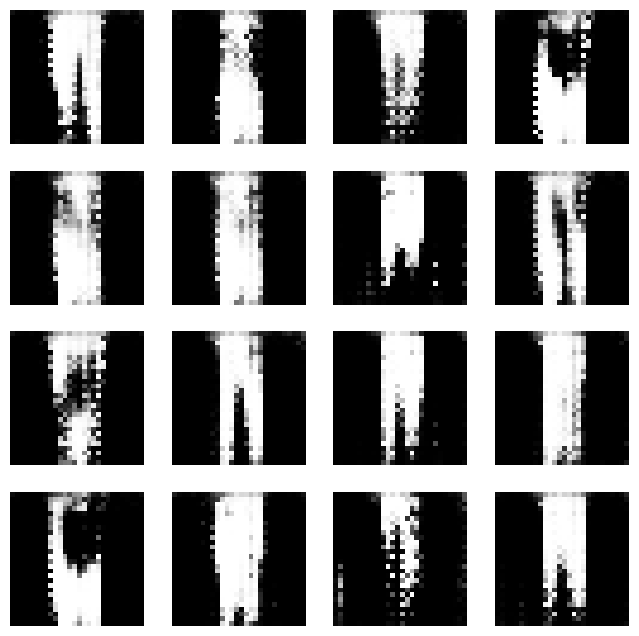

In [57]:
#Create 16 sample vectors with dimension size 100
sample_vectors = tf.random.normal([16, 100])

# Generate images from the trained generator model 
generated_images = generator_model_hozana(sample_vectors, training=False)

# Normalize the pixels in the generated images
generated_images = (generated_images * 127.5) + 127.5

plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')

plt.show()
